In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X = np.array([
    [1.2, 1.5],
    [0.2, 0.1],
    [1.6, 1.8],
    [2.2, 2.5],
    [0.5, 0.7],
    [3.0, 2.6],
    [3.2, 3.4],
    [0.8, 1.0],
    [2.6, 2.8],
    [1.5, 1.4]])

In [4]:
X_centered = X - X.mean(axis=0)

X_centered

array([[-0.48, -0.28],
       [-1.48, -1.68],
       [-0.08,  0.02],
       [ 0.52,  0.72],
       [-1.18, -1.08],
       [ 1.32,  0.82],
       [ 1.52,  1.62],
       [-0.88, -0.78],
       [ 0.92,  1.02],
       [-0.18, -0.38]])

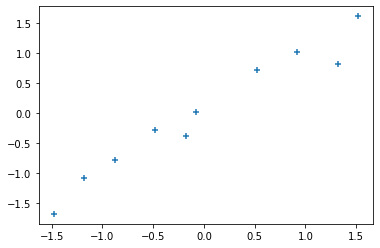

In [5]:
plt.scatter(X_centered[:, 0], X_centered[:, 1], marker='+')

In [6]:
m = X.shape[0]
X_cov = np.dot(X_centered.T, X_centered) / (m - 1)

X_cov

array([[1.08844444, 1.05622222],
       [1.05622222, 1.07511111]])

In [7]:
eigenvalues, eigenvectors = np.linalg.eig(X_cov)

In [8]:
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

eigenvalues, eigenvectors

(array([2.13802104, 0.02553452]),
 array([[ 0.70933479, -0.70487173],
        [ 0.70487173,  0.70933479]]))

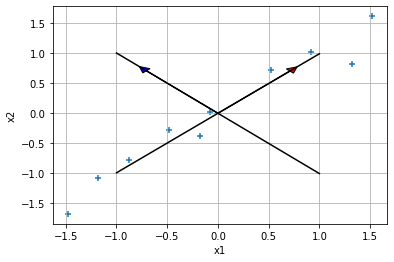

In [9]:
plt.scatter(X_centered[:, 0], X_centered[:, 1], marker='+')

line = np.linspace(-1, 1, 100)
plt.arrow(x=0, y=0, dx=eigenvectors[0, 0], dy=eigenvectors[1, 0], head_width=0.1, head_length=0.1, fc='r', ec='k')
plt.arrow(x=0, y=0, dx=eigenvectors[0, 1], dy=eigenvectors[1, 1], head_width=0.1, head_length=0.1, fc='b', ec='k')
plt.plot(line, line * (eigenvectors[1, 0]/eigenvectors[0, 0]), color='black')
plt.plot(line, line * (eigenvectors[1, 1]/eigenvectors[0, 1]), color='black')

plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.show()

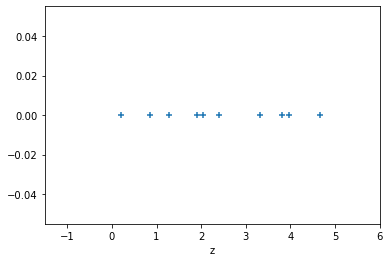

In [10]:
X_pca_1 = np.dot(X, eigenvectors[:, 0])
plt.scatter(X_pca_1, np.zeros(10), marker='+')
plt.xlim((-1.5, 6))
plt.xlabel("z")
plt.show()

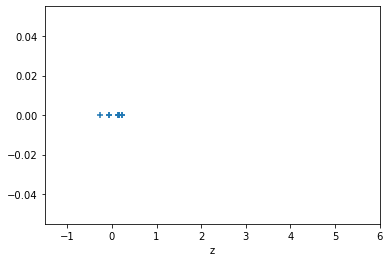

In [11]:
X_pca_2 = np.dot(X, eigenvectors[:, 1])
plt.scatter(X_pca_2, np.zeros(10), marker='+')
plt.xlim((-1.5, 6))
plt.xlabel("z")
plt.show()

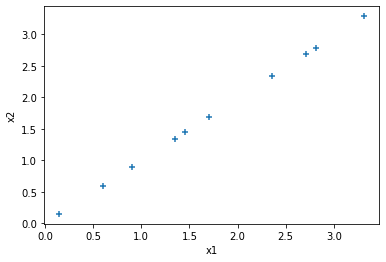

In [12]:
old_data_from_pca_1 = np.dot(X_pca_1.reshape(X_pca_1.shape[0], 1), eigenvectors[:, :1].T)
plt.scatter(old_data_from_pca_1[:, 0], old_data_from_pca_1[:, 1], marker='+')
# plt.xlim((-1.5, 2))
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [13]:
class PCA_Impl:

    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.explained_variance = None

    def fit(self, X):
        #średnia
        self.mean = np.mean(X, axis=0)
        X = X - self.mean
        #kowariancja
        cov = np.cov(X.T)
        #eigenvectors, eigenvalues
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        eigenvalues = eigenvalues.real
        eigenvectors = eigenvectors.real
        #sortowanie eigenvectors
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        self.explained_variance = eigenvalues/np.sum(eigenvalues)
        #zachowaj n ilosc eigenvectors
        self.components = eigenvectors[0:self.n_components]

    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.components.T)

    def inverse_transform(self, X):
        return np.dot(X, self.components) + self.mean

In [14]:
from PIL import Image
import matplotlib.pyplot as plt

img_grey = Image.open('./dataset/dolphines.jpg').convert('LA')

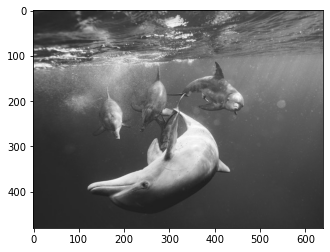

In [15]:
plt.imshow(img_grey)

In [16]:
image_mat = np.array(list(img_grey.getdata(band=0)), float)
image_mat.shape = (img_grey.size[1], img_grey.size[0])
image_mat = np.matrix(image_mat)

Wynik dla k = 10

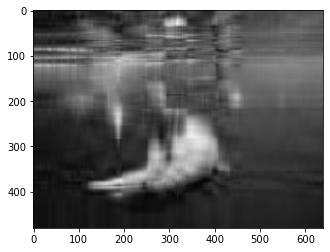

In [17]:
pca = PCA_Impl(10)
pca.fit(image_mat)
components = pca.transform(image_mat)
projected = pca.inverse_transform(components)

plt.imshow(projected.reshape(480, 640), cmap="gray")

Wynik dla k = 50

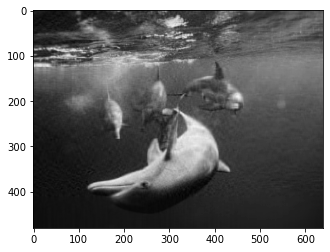

In [18]:
pca = PCA_Impl(50)
pca.fit(image_mat)
components = pca.transform(image_mat)
projected = pca.inverse_transform(components)

plt.imshow(projected.reshape(480, 640), cmap="gray")

Wynik dla k = 100 

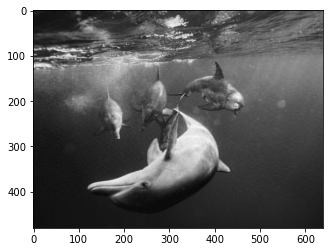

In [19]:
pca = PCA_Impl(100)
pca.fit(image_mat)
components = pca.transform(image_mat)
projected = pca.inverse_transform(components)

plt.imshow(projected.reshape(480, 640), cmap="gray")

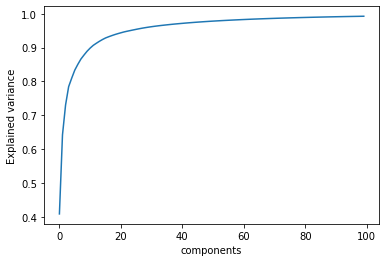

In [20]:
plt.plot(np.cumsum(pca.explained_variance[0:pca.n_components]))
plt.xlabel('components')
plt.ylabel('Explained variance');

In [21]:
ratio_cumsum = np.cumsum(pca.explained_variance)
n_components = np.searchsorted(ratio_cumsum, 0.95,
                                           side='right') + 1
print(n_components)

24


Dla 24 pierwszych składowych zachowane jest 95% wariancji

In [22]:
img = Image.open('./dataset/dolphines.jpg')

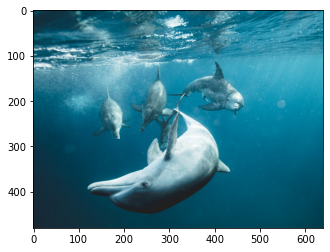

In [23]:
plt.imshow(img)

In [24]:
def image_PCA(image_m, k):
    
    r = image_m[:, :, 0]
    g = image_m[:, :, 1]
    b = image_m[:, :, 2]

    r_pca = PCA_Impl(k)
    r_pca.fit(r)
    r_components = r_pca.transform(r)
    r_projected = r_pca.inverse_transform(r_components)

    b_pca = PCA_Impl(k)
    b_pca.fit(b)
    b_components = b_pca.transform(b)
    b_projected = b_pca.inverse_transform(b_components)

    g_pca = PCA_Impl(k)
    g_pca.fit(g)
    g_components = g_pca.transform(g)
    g_projected = g_pca.inverse_transform(g_components)

    image_m[:,:,0] = r_projected
    image_m[:,:,1] = g_projected
    image_m[:,:,2] = b_projected
    
    return image_m

Wynik dla k = 50

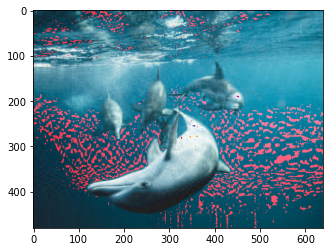

In [25]:
image_m = np.array(img)

k = 50

image_pca = image_PCA(image_m, k)

plt.imshow(image_m)

Wynik dla k = 100

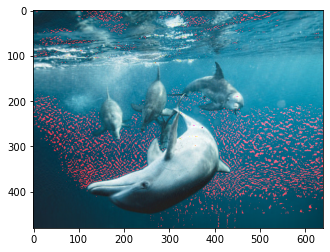

In [26]:
image_m = np.array(img)

k = 100

image_pca = image_PCA(image_m, k)

plt.imshow(image_m)

Wynik dla k = 200

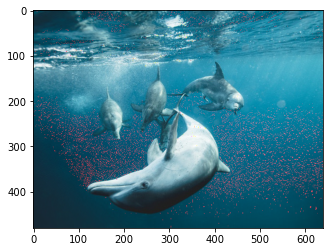

In [27]:
image_m = np.array(img)

k = 200

image_pca = image_PCA(image_m, k)

plt.imshow(image_m)

Wynik dla k = 250

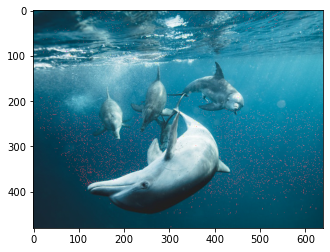

In [28]:
image_m = np.array(img)

k = 250

image_pca = image_PCA(image_m, k)

plt.imshow(image_m)

In [29]:
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data
# Po użyciu StandartScaler wyniki na wykresie są gorzej separowalne
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

y = iris.target

In [30]:
pca_iris = PCA_Impl(2)
pca_iris.fit(X)
X_projected = pca_iris.transform(X)

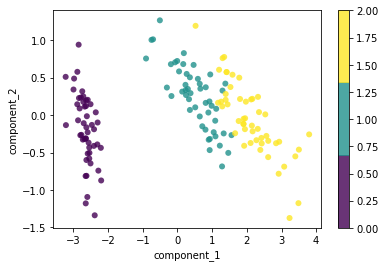

In [31]:
x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

plt.scatter(x1, x2, c=y, edgecolor='none', alpha=0.8, cmap=plt.cm.get_cmap('viridis', 3))
plt.xlabel('component_1')
plt.ylabel('component_2')
plt.colorbar()
plt.show()

Wydaje się, to dużo lepszym i wygodniejszym rozwiązaniem gdy trzeba zwizualnizować tego typu danych na płaszczyźnie i pozwala zachować największą część wariancji danych, w przeciwieństwie do wybrania pojedynczych cech.

In [32]:
pca_iris = PCA_Impl(3)
pca_iris.fit(X)
X_projected = pca_iris.transform(X)

Text(0.5, 0, 'component 3')

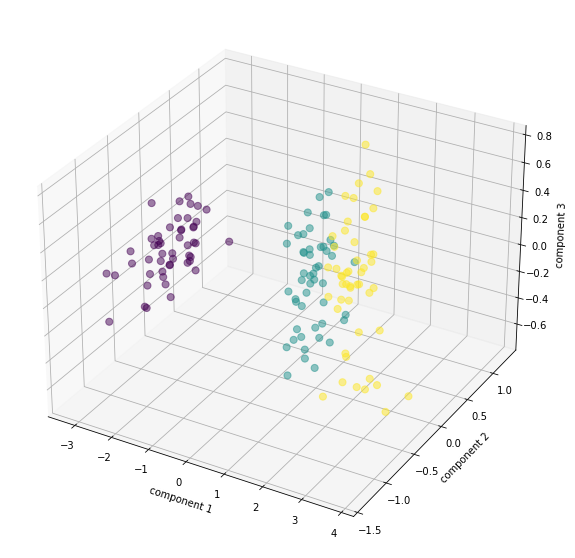

In [33]:
x1 = X_projected[:, 0]
x2 = X_projected[:, 1]
x3 = X_projected[:, 2]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, x3, c=y,  alpha=0.5, 
           cmap=plt.cm.get_cmap('viridis', 3), s=50)
ax.set_xlabel('component 1')
ax.set_ylabel('component 2')
ax.set_zlabel('component 3')

Wydaje się, że metoda pca jest przydatna do próby wizualizacji zbioru danych w sytuacji gdy ilośc cech w zbiorze przekracza 2 i 3, pozwala zachować największą część wariancji danych 